# Unit test for staNMF

In [1]:
from staNMF import instability
import numpy as np
import sklearn
import matplotlib.pyplot as plt

In [2]:
n, d, K = 100, 100, 10
D = np.maximum(np.random.normal(size = (n, K)),0)
A = np.maximum(np.random.normal(size = (K, d)),0)
X = D @ A + np.random.normal(0, 1, size = (n,d))
mask = np.random.choice([0, 1], p=[.9, .1], size = (n, d))
masked_X = X #- 1000 * mask 

In [3]:
ins = instability(masked_X.T, n_trials=10, folder_name='tmp', random_state=1000)

In [4]:
Ks = list(range(6, 15))
output = ins.fit_transform(Ks, parallel = False)
output

array([[5.43905042e-02, 2.97836222e-02],
       [5.65332566e-02, 2.68914265e-02],
       [1.83579840e-02, 1.64177511e-02],
       [6.49542560e-02, 1.75911091e-02],
       [4.14139500e-07, 9.83082390e-08],
       [4.44211568e-02, 9.98913621e-03],
       [8.48143969e-02, 1.01902111e-02],
       [1.12736138e-01, 1.11119214e-02],
       [1.19427426e-01, 1.65580049e-02]])

Text(0.5, 1.0, 'instability for different Ks')

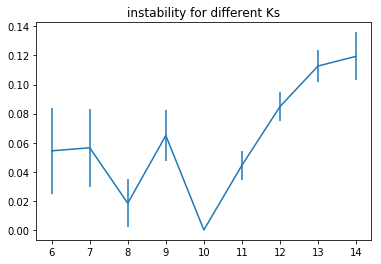

In [5]:
plt.errorbar(x = Ks, y = output[:,0], yerr=output[:,1])
plt.title('instability for different Ks')

## test cross validation

In [6]:
Ks = list(range(6, 15))
output = ins.transform_cv(Ks, nfolds=2)
output

Calculating prediction instability for 6
num_samples larger than total_sample, force it to be smaller.
Calculating prediction instability for 7
Calculating prediction instability for 8
Calculating prediction instability for 9
Calculating prediction instability for 10
Calculating prediction instability for 11
Calculating prediction instability for 12
Calculating prediction instability for 13
Calculating prediction instability for 14


array([[1.42032148e+00, 1.77171438e-03],
       [1.35558536e+00, 8.57309467e-04],
       [1.28431316e+00, 6.55708865e-04],
       [1.23135970e+00, 9.26892900e-04],
       [1.17439020e+00, 5.33137804e-06],
       [1.18926510e+00, 5.96291469e-03],
       [1.20633011e+00, 7.02886494e-03],
       [1.22647960e+00, 5.08160988e-03],
       [1.24550720e+00, 4.68168032e-03]])

Text(0.5, 1.0, 'MSE for different Ks')

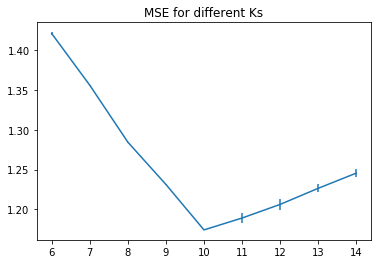

In [7]:
plt.errorbar(x = Ks, y = output[:,0], yerr=output[:,1])
plt.title('MSE for different Ks')

## test parallel

In [13]:
%timeit ins.fit(Ks, parallel = True, processes = len(Ks))

4.19 s ± 79.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit ins.fit(Ks, parallel = False)

6.67 s ± 41.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
